In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np
sys.path.append('./../src')
from manuscript import inout, datasets, export
from string import punctuation
from scipy.stats import pearsonr

In [3]:
# Set plot defaults
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["font.size"] = 20

In [4]:
studies = datasets.gwas_catalog(table='studies')

In [5]:
studies.head()

,date_added_to_catalog,pubmed_id,first_author,date,journal,link,study,disease/trait,initial_sample_size,replication_sample_size,...,genotyping_technology,submission_date,statistical_model,background_trait,mapped_background_trait,mapped_background_trait_uri,cohort,full_summary_statistics,summary_stats_location,gxe
0,2015-12-16,25672763,Ueta M,2015-02-08,J Allergy Clin Immunol,www.ncbi.nlm.nih.gov/pubmed/25672763,"IKZF1, a new susceptibility gene for cold medi...",Cold medicine-related Stevens-Johnson syndrome...,"117 Japanese ancestry cases, 691 Japanese ance...","43 East Asian ancestry cases, 278 East Asian a...",...,Genome-wide genotyping array,nan,nan,nan,nan,nan,nan,no,nan,no
1,2016-01-12,25649651,Wang X,2015-02-03,J Alzheimers Dis,www.ncbi.nlm.nih.gov/pubmed/25649651,Genetic Determinants of Survival in Patientswi...,Alzheimer's disease (survival time),983 cases,nan,...,Genome-wide genotyping array,nan,nan,nan,nan,nan,nan,no,nan,no
2,2015-11-07,25672891,Shimizu S,2015-02-11,J Dent Res,www.ncbi.nlm.nih.gov/pubmed/25672891,A genome-wide association study of periodontit...,Periodontitis,"1,593 Japanese ancestry cases, 7,980 Japanese ...","1,167 Japanese ancestry cases, 7,178 Japanese ...",...,Genome-wide genotyping array,nan,nan,nan,nan,nan,nan,no,nan,no
3,2016-01-05,25628645,Tong Y,2015-01-13,Front Genet,www.ncbi.nlm.nih.gov/pubmed/25628645,Identification of genetic variants or genes th...,Response to Homoharringtonine (cytotoxicity),93 African American ancestry lymphoblastoid ce...,nan,...,Genome-wide genotyping array,nan,nan,nan,nan,nan,nan,no,nan,no
4,2015-05-30,25241909,Lee JH,2014-09-21,Respir Res,www.ncbi.nlm.nih.gov/pubmed/25241909,Genetic susceptibility for chronic bronchitis ...,Chronic obstructive pulmonary disease,"3,777 European ancestry cases, 3,520 European ...",nan,...,Genome-wide genotyping array,nan,nan,nan,nan,nan,nan,no,nan,no


In [6]:
associations = datasets.gwas_catalog(table='associations')

In [7]:
associations.head()

,date_added_to_catalog,pubmed_id,first_author,date,journal,link,study,disease/trait,initial_sample_size,replication_sample_size,...,pvalue_mlog,p_value_(text),or_or_beta,95%_ci_(text),platform_[snps_passing_qc],cnv,mapped_trait,mapped_trait_uri,study_accession,genotyping_technology
0,2015-12-18,25574825,Baurecht H,2015-01-08,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/25574825,Genome-wide comparative analysis of atopic der...,Inflammatory skin disease,"2,079 European ancestry atopic dermatitis case...",nan,...,16.698970,(Atopic dermatitis),1.23,[1.15–1.32],"Affymetrix, Illumina [~ 5200000]",N,atopic eczema,http://www.ebi.ac.uk/efo/EFO_0000274,GCST002740,Genome-wide genotyping array
1,2015-12-18,25574825,Baurecht H,2015-01-08,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/25574825,Genome-wide comparative analysis of atopic der...,Inflammatory skin disease,"2,079 European ancestry atopic dermatitis case...",nan,...,15.045757,(Psoriasis),1.27,[1.20–1.34],"Affymetrix, Illumina [~ 5200000]",N,psoriasis,http://www.ebi.ac.uk/efo/EFO_0000676,GCST002740,Genome-wide genotyping array
2,2015-12-18,25574825,Baurecht H,2015-01-08,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/25574825,Genome-wide comparative analysis of atopic der...,Inflammatory skin disease,"2,079 European ancestry atopic dermatitis case...",nan,...,24.301030,(Atopic dermatitis),1.49,[1.38–1.61],"Affymetrix, Illumina [~ 5200000]",N,atopic eczema,http://www.ebi.ac.uk/efo/EFO_0000274,GCST002740,Genome-wide genotyping array
3,2015-12-18,25574825,Baurecht H,2015-01-08,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/25574825,Genome-wide comparative analysis of atopic der...,Inflammatory skin disease,"2,079 European ancestry atopic dermatitis case...",nan,...,13.698970,(Psoriasis),1.29,[1.21–1.38],"Affymetrix, Illumina [~ 5200000]",N,psoriasis,http://www.ebi.ac.uk/efo/EFO_0000676,GCST002740,Genome-wide genotyping array
4,2015-12-18,25574825,Baurecht H,2015-01-08,Am J Hum Genet,www.ncbi.nlm.nih.gov/pubmed/25574825,Genome-wide comparative analysis of atopic der...,Inflammatory skin disease,"2,079 European ancestry atopic dermatitis case...",nan,...,11.698970,(Atopic dermatitis),1.54,[1.37–1.73],"Affymetrix, Illumina [~ 5200000]",N,atopic eczema,http://www.ebi.ac.uk/efo/EFO_0000274,GCST002740,Genome-wide genotyping array


In [8]:
# Total number of entries
associations.shape

(692444, 38)

In [9]:
# Total number of studies
associations['pubmed_id'].unique().shape

(6208,)

### Data cleaning: Risk Allele Frequency 

In [10]:
# Begin data cleaning
raf = associations['risk_allele_frequency']

In [11]:
# Function to determine if data can be converted to float without error
def is_float(element: any) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

In [12]:
# Identify unexpected data input
raf[-raf.map(is_float)].unique()

### Goal: remove anything besides ranges

array(['NR', '0.095 ￼', '0.17 (European)', '0.26 (EA+AA)',
       '0.33 (men and women combined)', '0.23 (men and women combined)',
       '0.70 (HapMap CEU)', '0.67 (EA)', '0.87 (EA)', '0.49 (EA)',
       '0.77 (EA)', '0.73 (EA)', '0.98-0.99', '0.38-0.47', '0.89-0.94',
       '0.93-0.97', '0.40-0.46', '0.54-0.62', '0.51-0.58', '0.21-0.27',
       '0.41-0.49', '0.51-0.56', '0.46-0.52', '0.47-0.54', '0.08-0.12',
       '0·341', '0,177', 'WIF1, LEMD3, MSRB3'], dtype=object)

In [13]:
# Define function to identify if reported value is a range, and return median value of range
# Cannot match "-" because that will catch numbers in scientific notation (i.e. 3.1e-4) 
# Solution: match strings with two ".", split by delimiter "-", return median of two values
def convert_range(x):
    if x.count(".") == 2:
        x = str.split(x, sep = "-")
        x = [float(y) for y in x]
        x = st.median(x)
        return x
    else: 
        return x

In [14]:
# Convert ranges to median value
raf = raf.map(convert_range)

In [15]:
raf[-raf.map(is_float)].unique()

array(['NR', '0.095 ￼', '0.17 (European)', '0.26 (EA+AA)',
       '0.33 (men and women combined)', '0.23 (men and women combined)',
       '0.70 (HapMap CEU)', '0.67 (EA)', '0.87 (EA)', '0.49 (EA)',
       '0.77 (EA)', '0.73 (EA)', '0·341', '0,177', 'WIF1, LEMD3, MSRB3'],
      dtype=object)

In [16]:
# Quantify NR values
print("NR values make up", 
      raf[raf == "NR"].size/raf.size, 
      "of the entries before filtering")

NR values make up 0.5226271005308732 of the entries before filtering


In [17]:
# Remove NR and non-float values
raf = raf[raf.map(is_float)]

In [18]:
# Convert all to float
raf_test = raf.map(float)
raf_test.isnull().sum()

128

In [19]:
# Problem: original dataset contains strings saying 'nan' that yield TRUE from is_float()
raf[raf_test[raf_test.isnull()].index]

88879     nan
88880     nan
88881     nan
88883     nan
88884     nan
         ... 
428438    nan
428439    nan
428440    nan
428441    nan
428442    nan
Name: risk_allele_frequency, Length: 128, dtype: object

In [20]:
# Remove "nan" strings
raf = raf[-raf_test.isnull()]

In [21]:
# Remove values outside of range 0-1
raf = raf.map(float)
raf = raf[raf >= 0]
raf = raf[raf <= 1]
raf.size

330375

In [22]:
# Keep only filtered rows
associations = associations.iloc[raf[raf.map(is_float)].index]

# Save updated values
associations['risk_allele_frequency_cleaned'] = raf

In [23]:
associations.shape

(330375, 39)

### Check distribution of risk allele frequency

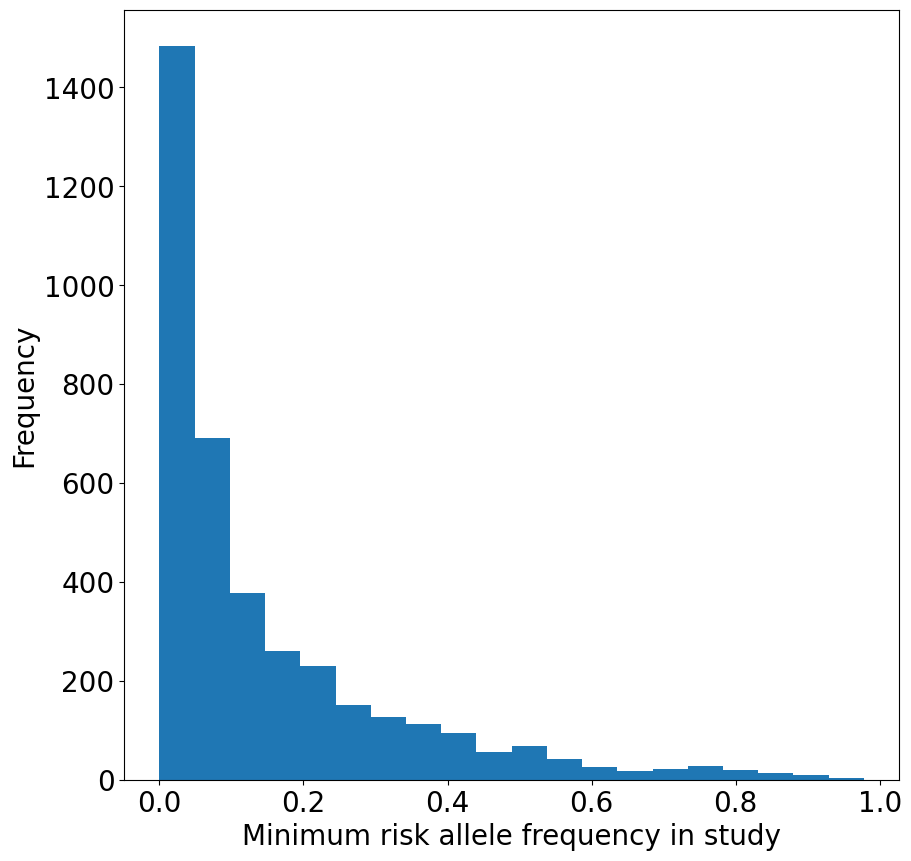

In [29]:
# Plot distribution of rarest risk allele frequency in study
x = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].min().map(float)
plt.hist(x, bins = 20)
plt.xlabel("Minimum risk allele frequency in study")
plt.ylabel("Frequency")

export.image(p='../figures/min_risk_allele_frequency_dist.png')

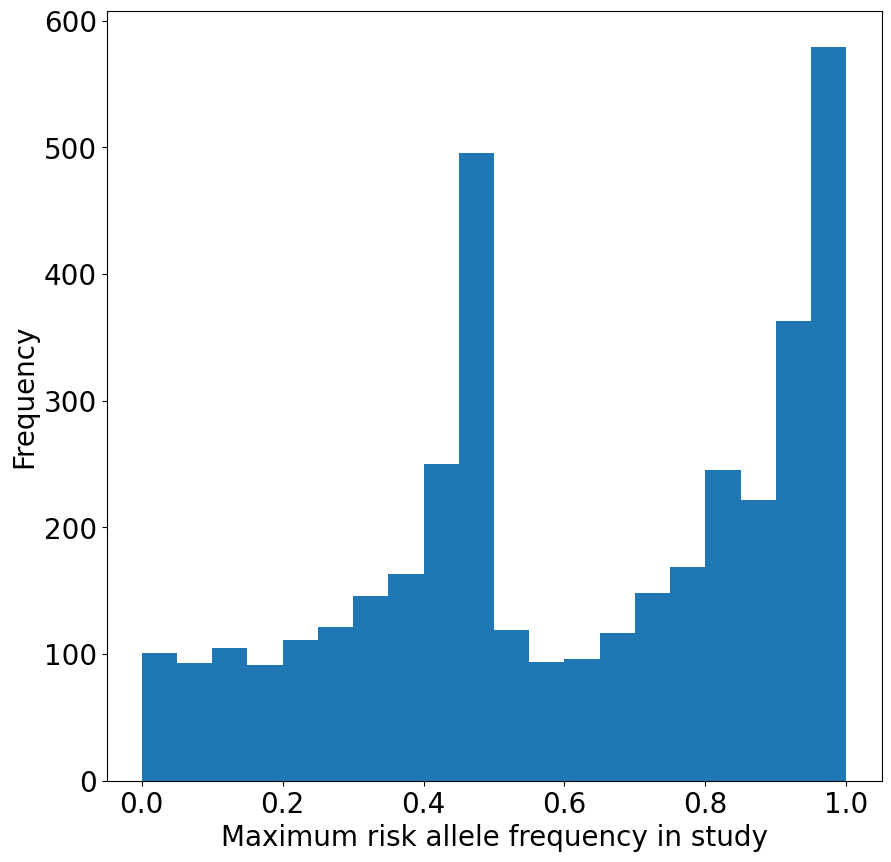

In [30]:
# Plot distribution of maximum risk allele frequency in study
x = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].max().map(float)
plt.hist(x, bins = 20)
plt.xlabel("Maximum risk allele frequency in study")
plt.ylabel("Frequency")

export.image(p='../figures/max_risk_allele_frequency_dist.png')

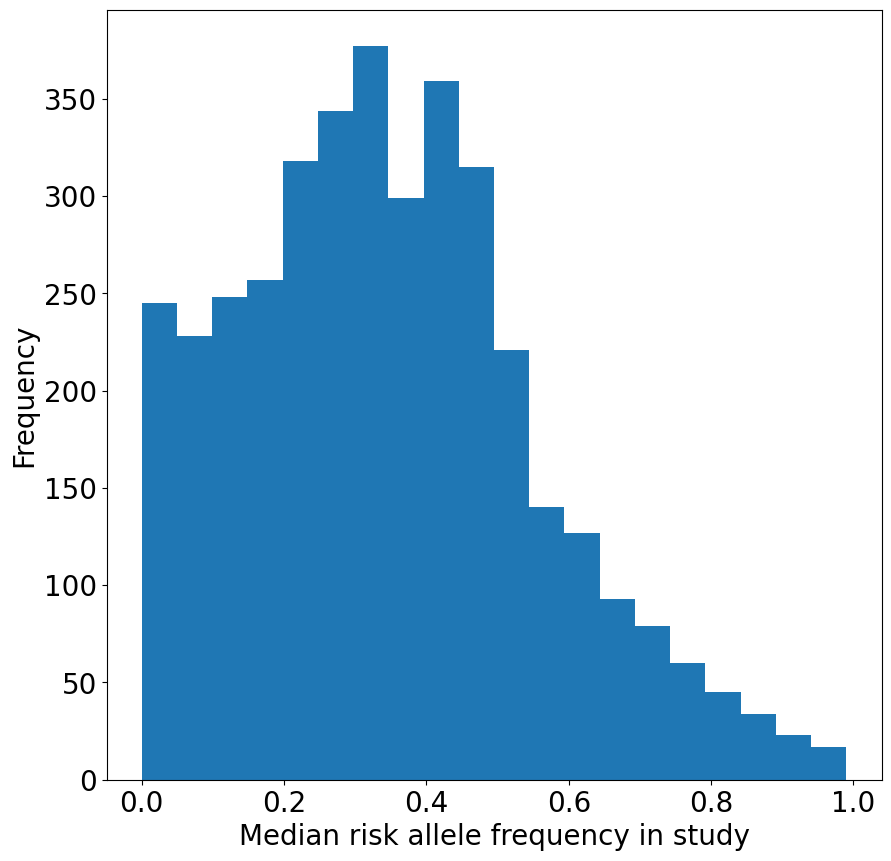

In [31]:
# Plot distribution of median risk allele frequency in study
x = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].median().map(float)
plt.hist(x, bins = 20)
plt.xlabel("Median risk allele frequency in study")
plt.ylabel("Frequency")

export.image(p='../figures/median_risk_allele_frequency_dist.png')

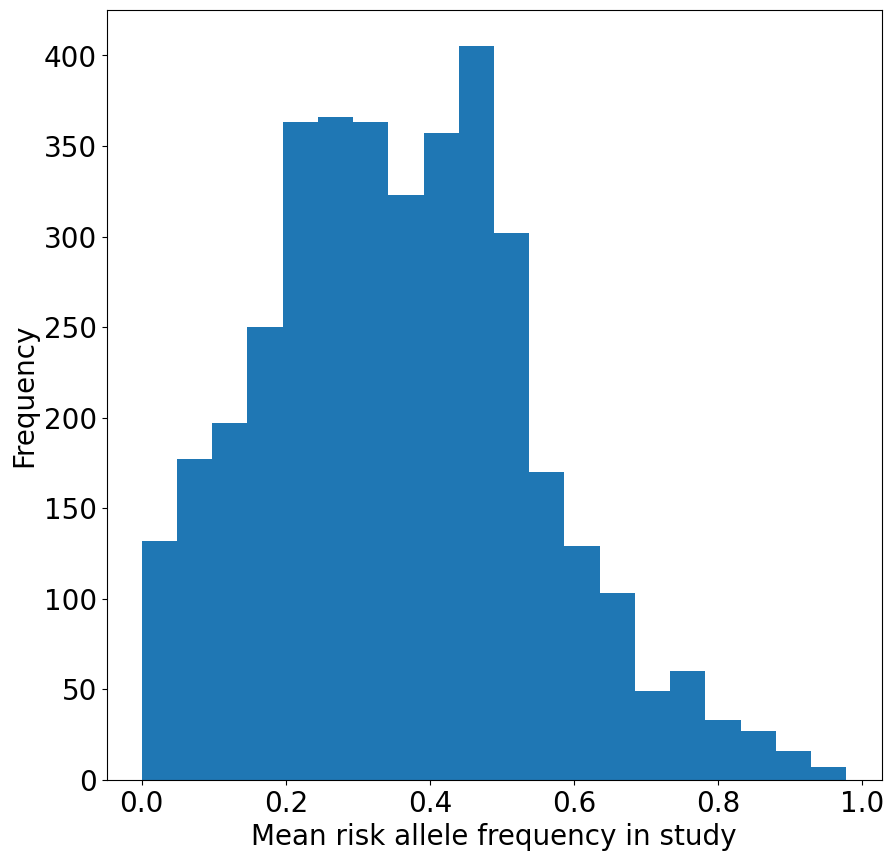

In [32]:
# Plot distribution of average risk allele frequency in study
x = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].mean().map(float)
plt.hist(x, bins = 20)
plt.xlabel("Mean risk allele frequency in study")
plt.ylabel("Frequency")

export.image(p='../figures/mean_risk_allele_frequency_dist.png')

### Calculate total cohort size

In [33]:
# Pull initial sample sizes
sample_size = associations['initial_sample_size']

# Remove any special characters
for p in punctuation: 
    sample_size = sample_size.apply(str.replace, args = (p, ""))

# Split by whitespace (default) and select only list items that are numeric
sample_size = sample_size.apply(
    str.split).map(
    lambda x: list(filter(str.isnumeric, x)))

# Convert elements to interger to avoid error with sum()
sample_size = sample_size.map(lambda x: [int(y) for y in x])

# Sum numbers for total cohort size
sample_size = sample_size.apply(sum)

# Save in data frame
associations['total_cohort_size'] = sample_size

# Remove entries with no reported numbers 
associations = associations[associations['total_cohort_size'] > 0]

### Check distribution of cohort size

In [34]:
# Check distributions of cohort size
print(
    associations['total_cohort_size'].min(),
    associations['total_cohort_size'].max(),
    associations['total_cohort_size'].median()
)

6 5314291 130777.0


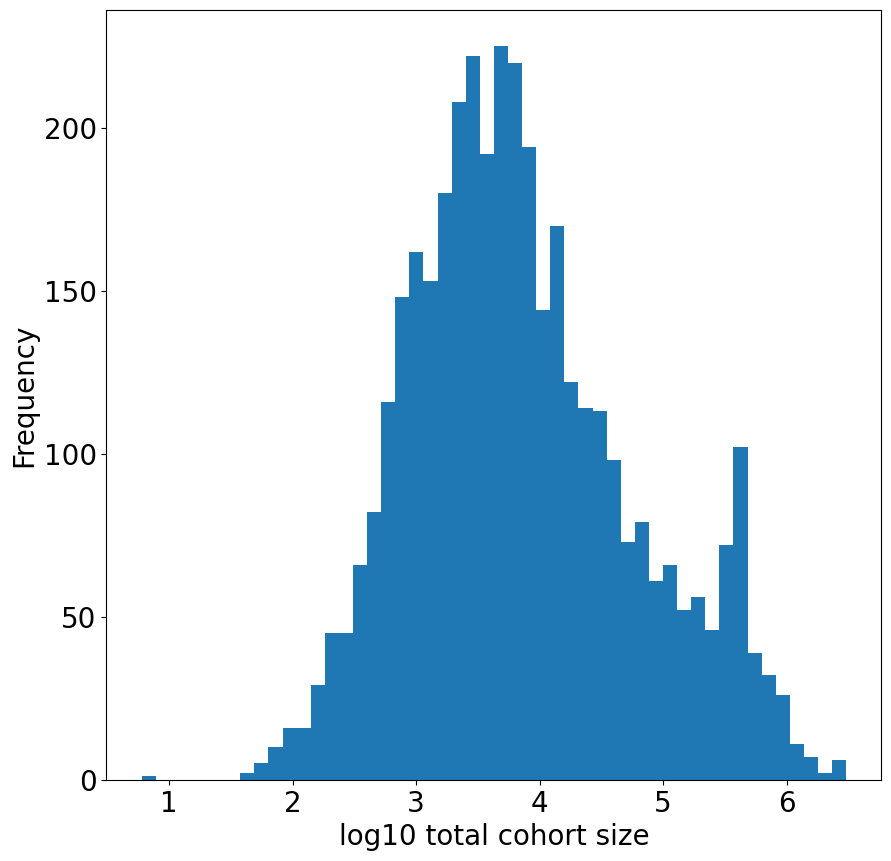

In [35]:
# Plot distribution of cohort sizes
x = associations[['pubmed_id', 'total_cohort_size']].drop_duplicates('pubmed_id')[['total_cohort_size']]
plt.hist(np.log10(x), bins = 50)
plt.xlabel("log10 total cohort size")
plt.ylabel("Frequency")

export.image(p='../figures/cohort_size_dist.png')

### Cohort size vs. risk allele frequency

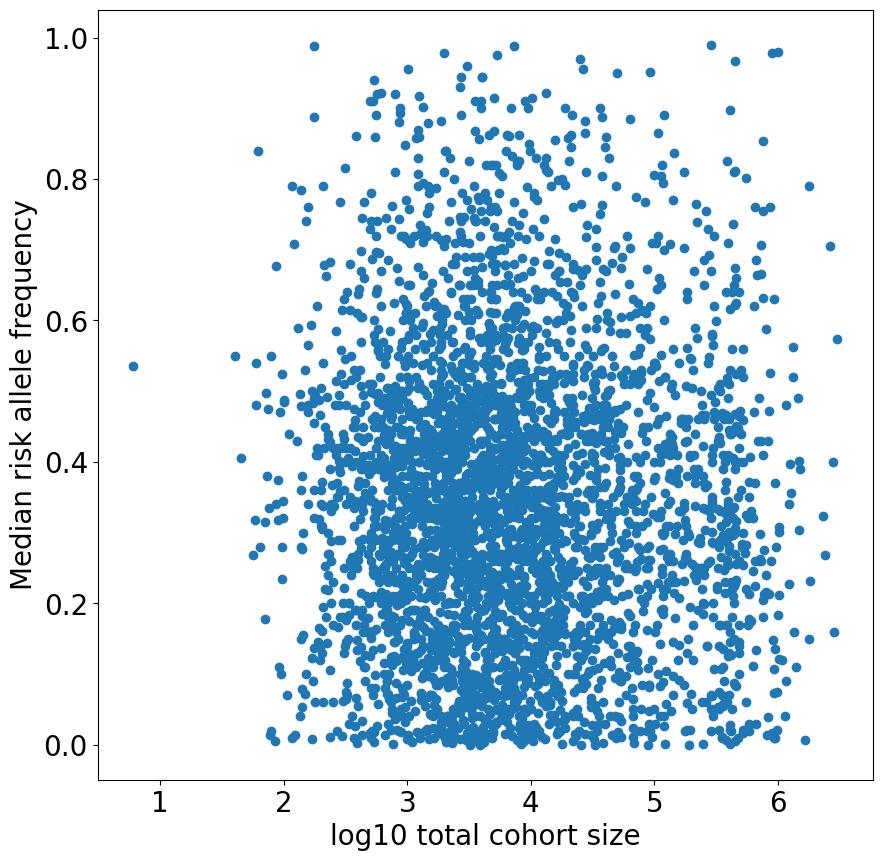

In [36]:
x = associations[['pubmed_id', 'total_cohort_size']].drop_duplicates('pubmed_id')['total_cohort_size']
y = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].median().map(float)

plt.scatter(x = np.log10(x), y = y)
plt.xlabel("log10 total cohort size")
plt.ylabel("Median risk allele frequency")

export.image(p='../figures/median_risk_allele_frequency_cohort_size_correlation.png')

In [33]:
# Calculate pearson correlation
pearsonr(np.log10(x), y)

PearsonRResult(statistic=-0.020549496200453692, pvalue=0.20368118295412257)

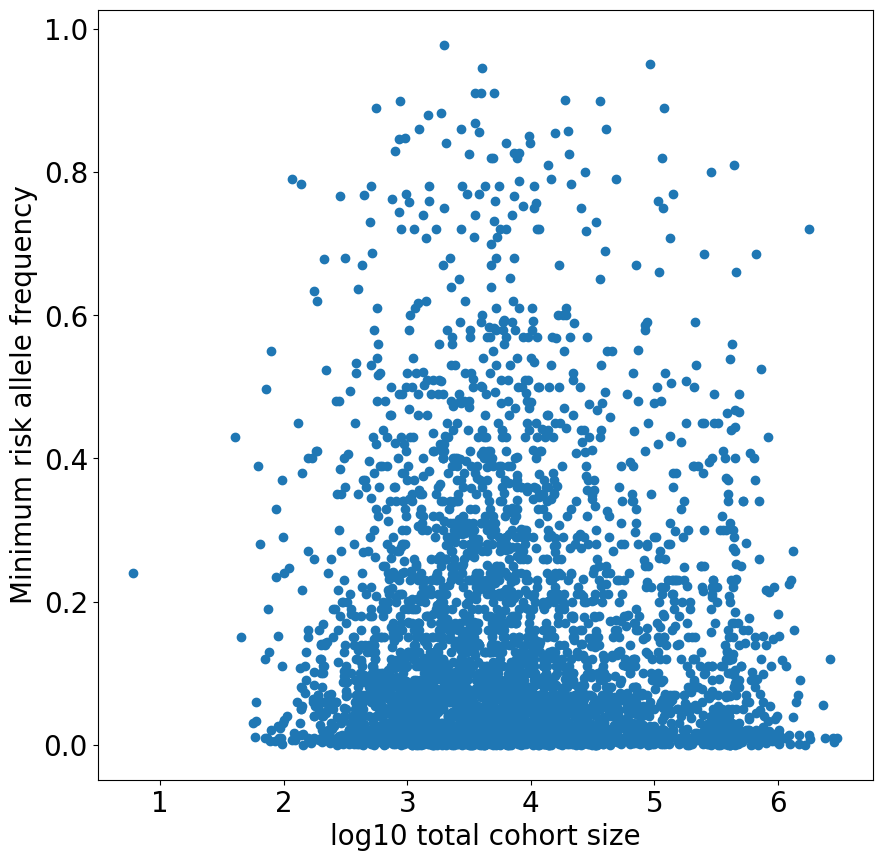

In [37]:
x = associations[['pubmed_id', 'total_cohort_size']].drop_duplicates('pubmed_id')['total_cohort_size']
y = associations.groupby(by = 'pubmed_id')['risk_allele_frequency_cleaned'].min().map(float)

plt.scatter(x = np.log10(x), y = y)
plt.xlabel("log10 total cohort size")
plt.ylabel("Minimum risk allele frequency")

export.image(p='../figures/min_risk_allele_frequency_cohort_size_correlation.png')

In [35]:
# Calculate pearson correlation
pearsonr(np.log10(x), y)

PearsonRResult(statistic=-0.03305363987705505, pvalue=0.04086007546511573)